In [2]:
from modules import load_data, evaluate_outputs


train_data, validation_data, test_data = load_data()

# Fine tuning T5 small

In [2]:
from fine_tuning_t5 import T5QLoRA

t5_small = T5QLoRA('t5-small')
t5_small.define_model()
tokenized_train, tokenized_validation, tokenized_test = t5_small.preprocess_data(train_data, validation_data, test_data)
t5_small.prepare_trainer(tokenized_train, tokenized_validation, num_train_epochs=3)
t5_small.fine_tune()

[nltk_data] Downloading package wordnet to /home/logan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/logan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/logan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Map:   0%|          | 0/7182 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3643 [00:00<?, ? examples/s]

/home/logan/Documents/Codebase/chata-assignment/modeling/fine_tuning_t5.py:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  self.trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
/home/logan/Documents/venvs/uv-latest/.venv/lib/python3.11/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return f

Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Meteor,Bleu
100,0.915500,0.755006,0.594245,0.499654,0.582500,0.582373,0.645779,0.441288
200,0.545000,0.430589,0.845591,0.767811,0.835385,0.835142,0.858325,0.729548
300,0.511500,0.367940,0.883009,0.817711,0.872937,0.873099,0.885111,0.780020
400,0.538200,0.344011,0.898488,0.834171,0.887828,0.887640,0.900503,0.800174
500,0.415500,0.338561,0.906131,0.845259,0.895601,0.895326,0.910959,0.814094
600,0.431000,0.324378,0.912541,0.853023,0.901386,0.901504,0.913358,0.818806
700,0.409800,0.322413,0.914742,0.855222,0.902911,0.902940,0.917494,0.822751
800,0.575000,0.304923,0.915124,0.858418,0.904037,0.903737,0.917083,0.826638
900,0.304600,0.298072,0.922353,0.867594,0.910858,0.910860,0.923570,0.834221
1000,0.406800,0.298219,0.920614,0.867138,0.909291,0.909129,0.922185,0.834134


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/home/logan/Documents/venvs/uv-latest/.venv/lib/python3.11/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/logan/Documents/venvs/uv-latest/.venv/lib/python3.11/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentran

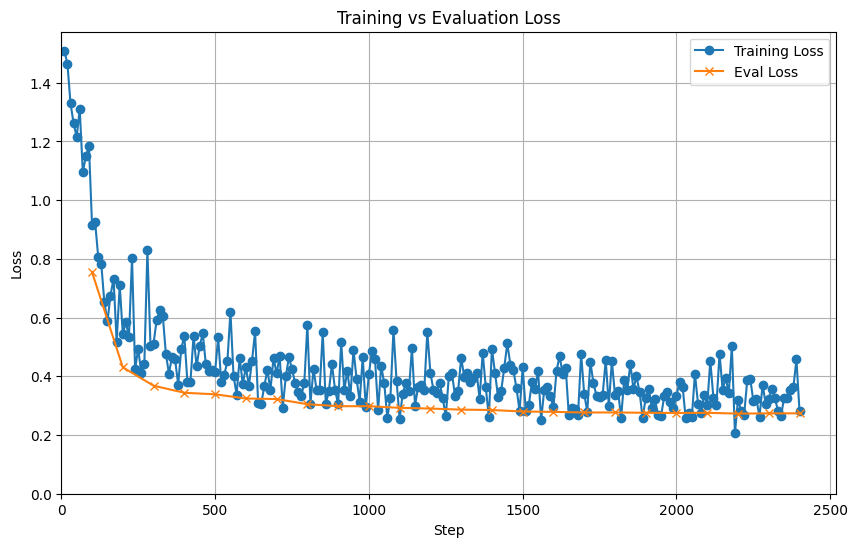

In [3]:
t5_small.plot_training_error()

In [4]:
batch_size = 128
training_outputs = t5_small.mini_batch_inference(train_data['inputs'], batch_size=batch_size)
validation_outputs = t5_small.mini_batch_inference(validation_data['inputs'], batch_size=batch_size)
t5_small_validation_metrics = evaluate_outputs(validation_outputs, validation_data['targets'])
print("Evaluation metrics of the fine tuned t5-small model on the validation set:")
t5_small_validation_metrics

[nltk_data] Downloading package wordnet to /home/logan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/logan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/logan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation metrics of the fine tuned t5-small model on the validation set:


{'rouge1': np.float64(0.9367000335696709),
 'rouge2': np.float64(0.8880307744917468),
 'rougeL': np.float64(0.9251789973663795),
 'rougeLsum': np.float64(0.9246732907338556),
 'meteor': np.float64(0.9413968542905455),
 'bleu': 0.8638506514067124,
 'semantic similarity': 0.9615944623947144}

# Fine tuning T5 base

In [2]:
from fine_tuning_t5 import T5QLoRA

t5_base = T5QLoRA('t5-base')
t5_base.define_model()
tokenized_train, tokenized_validation, tokenized_test = t5_base.preprocess_data(train_data, validation_data, test_data)
t5_base.prepare_trainer(tokenized_train, tokenized_validation, num_train_epochs=3)
t5_base.fine_tune()

[nltk_data] Downloading package wordnet to /home/logan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/logan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/logan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Map:   0%|          | 0/7182 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3643 [00:00<?, ? examples/s]

/home/logan/Documents/Codebase/chata-assignment/modeling/fine_tuning_t5.py:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  self.trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
/home/logan/Documents/venvs/uv-latest/.venv/lib/python3.11/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return f

Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Meteor,Bleu
100,0.673800,0.527211,0.762948,0.672658,0.750303,0.750230,0.831308,0.553558
200,0.406000,0.300757,0.894008,0.833440,0.883379,0.883115,0.897116,0.791210
300,0.359900,0.252288,0.923668,0.872167,0.912543,0.912086,0.922546,0.833043
400,0.320500,0.237837,0.934736,0.887483,0.923516,0.923288,0.932968,0.850674
500,0.260700,0.231075,0.940963,0.898419,0.929838,0.929435,0.939590,0.865362
600,0.284600,0.224247,0.940320,0.897622,0.929505,0.929275,0.940967,0.864748
700,0.294700,0.218988,0.942306,0.901768,0.932283,0.931831,0.941236,0.870212
800,0.418900,0.212220,0.945799,0.907468,0.935350,0.935042,0.945144,0.877831
900,0.206800,0.208185,0.946271,0.907364,0.936249,0.935785,0.945031,0.877485
1000,0.286400,0.206673,0.949345,0.911153,0.938835,0.938555,0.947608,0.881261


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/home/logan/Documents/venvs/uv-latest/.venv/lib/python3.11/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/logan/Documents/venvs/uv-latest/.venv/lib/python3.11/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentran

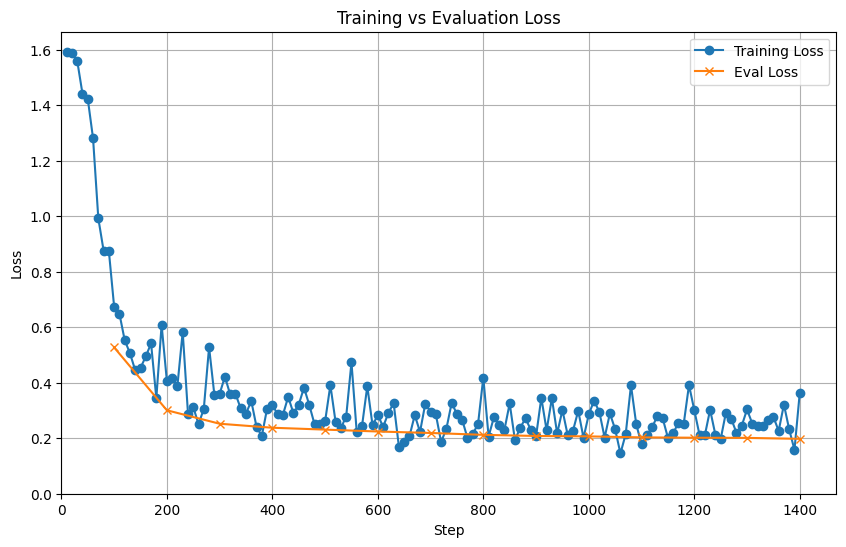

In [3]:
t5_base.plot_training_error()

In [4]:
batch_size = 128
training_outputs = t5_base.mini_batch_inference(train_data['inputs'], batch_size=batch_size)
validation_outputs = t5_base.mini_batch_inference(validation_data['inputs'], batch_size=batch_size)
t5_base_validation_metrics = evaluate_outputs(validation_outputs, validation_data['targets'])
print("Evaluation metrics of the fine tuned t5-base model on the validation set:")
t5_base_validation_metrics

[nltk_data] Downloading package wordnet to /home/logan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/logan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/logan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation metrics of the fine tuned t5-bse model on the validation set:


{'rouge1': np.float64(0.9535436519302953),
 'rouge2': np.float64(0.916161981149189),
 'rougeL': np.float64(0.9431457041868889),
 'rougeLsum': np.float64(0.9426104252470031),
 'meteor': np.float64(0.9569733916917719),
 'bleu': 0.8976224919158396,
 'semantic similarity': 0.974522590637207}

# Fine tuning T5 large

In [3]:
from fine_tuning_t5 import T5QLoRA

t5_large = T5QLoRA('t5-large')
t5_large.define_model()
tokenized_train, tokenized_validation, tokenized_test = t5_large.preprocess_data(train_data, validation_data, test_data)
t5_large.prepare_trainer(tokenized_train, tokenized_validation, num_train_epochs=1)
t5_large.fine_tune()

[nltk_data] Downloading package wordnet to /home/logan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/logan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/logan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Map:   0%|          | 0/7182 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3643 [00:00<?, ? examples/s]

/home/logan/Documents/Codebase/chata-assignment/modeling/fine_tuning_t5.py:156: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  self.trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
/home/logan/Documents/venvs/uv-latest/.venv/lib/python3.11/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return f

Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Meteor,Bleu
100,0.659900,0.482078,0.764941,0.663479,0.751729,0.751174,0.827868,0.556787
200,0.308800,0.261204,0.910235,0.852392,0.897817,0.897614,0.910039,0.805534
300,0.291600,0.221573,0.932955,0.885159,0.922661,0.922776,0.932276,0.847270
400,0.270100,0.203077,0.940658,0.897512,0.930529,0.930034,0.940706,0.863401
500,0.221900,0.194513,0.944589,0.904385,0.934337,0.934085,0.945350,0.875826
600,0.239100,0.189173,0.947836,0.910753,0.938983,0.938724,0.946859,0.880716
700,0.251100,0.186066,0.948031,0.910685,0.939197,0.938843,0.948515,0.883299
800,0.373200,0.183345,0.950235,0.913467,0.941017,0.940774,0.949442,0.886557


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/home/logan/Documents/venvs/uv-latest/.venv/lib/python3.11/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


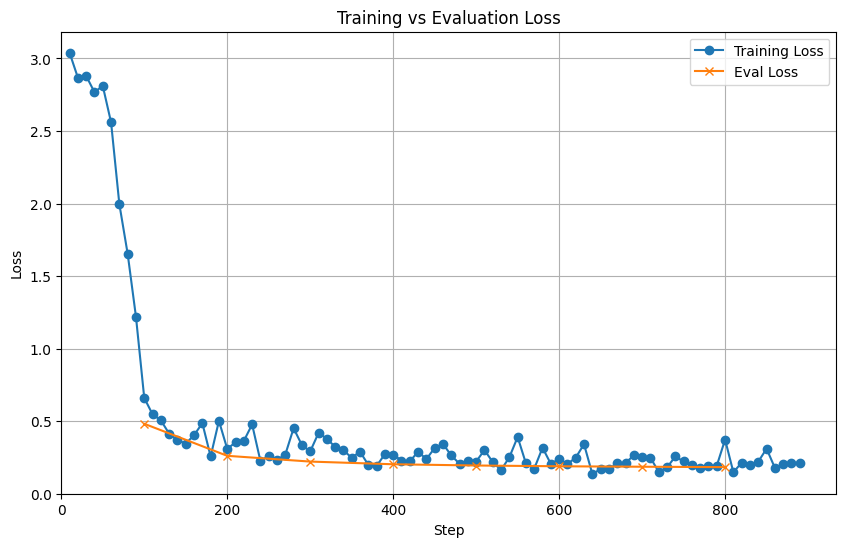

In [4]:
t5_large.plot_training_error()

In [2]:
batch_size = 8
validation_outputs = t5_large.mini_batch_inference(validation_data['inputs'], batch_size=batch_size)
t5_large_validation_metrics = evaluate_outputs(validation_outputs, validation_data['targets'])
print("Evaluation metrics of the fine tuned t5-large model on the validation set:")
t5_large_validation_metrics

[nltk_data] Downloading package wordnet to /home/logan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/logan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/logan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation metrics of the fine tuned t5-large model on the validation set:


{'rouge1': np.float64(0.9474753018505706),
 'rouge2': np.float64(0.906821761941604),
 'rougeL': np.float64(0.9366061352085372),
 'rougeLsum': np.float64(0.9365856937072428),
 'meteor': np.float64(0.9554782623892133),
 'bleu': 0.8815002857802234,
 'semantic similarity': 0.9713670611381531}

# Best model evaluation on the test set

In [3]:
import torch
from modules import load_model, mini_batch_inference

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

best_model_name = 't5-base'
tokenizer, model = load_model(best_model_name, device)
model.eval()

batch_size = 128
test_outputs = mini_batch_inference(test_data['inputs'], model, tokenizer, batch_size, device)
final_metrics = evaluate_outputs(test_outputs, test_data['targets'])
print("Evaluation metrics of the fine tuned t5-base model on the test set:")
final_metrics

[nltk_data] Downloading package wordnet to /home/logan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/logan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/logan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation metrics of the fine tuned t5-base model on the test set:


{'rouge1': np.float64(0.9439063235897658),
 'rouge2': np.float64(0.8985236630441664),
 'rougeL': np.float64(0.9321932520261593),
 'rougeLsum': np.float64(0.9322298810144611),
 'meteor': np.float64(0.944947541372809),
 'bleu': 0.8775295103829626,
 'semantic similarity': 0.9680015444755554}